In [1]:
import os
import google.generativeai as genai


genai.configure(api_key=os.environ["GOOGLE_API_KEY"])

generation_config = {
  "temperature": 1,
  "top_p": 0.95,
  "top_k": 64,
  "max_output_tokens": 8192,
  "response_mime_type": "text/plain",
}

model = genai.GenerativeModel(
  model_name="gemini-1.5-flash",
  generation_config=generation_config,
)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
data = pd.read_csv('Dataset.csv')

In [4]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

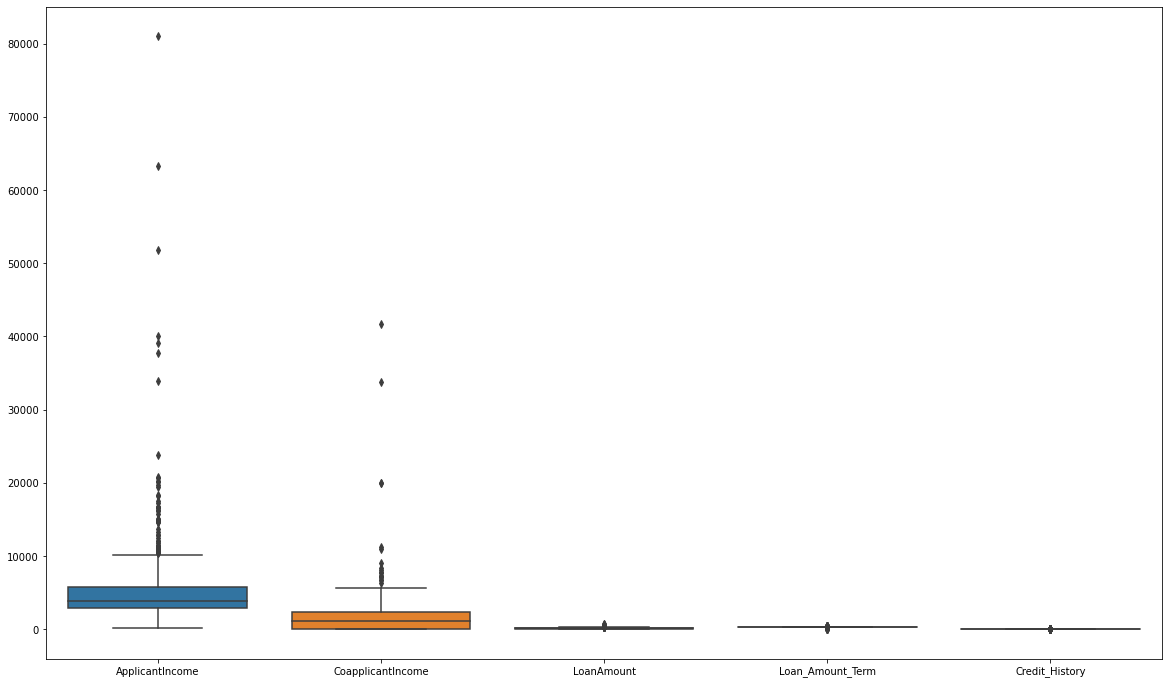

In [5]:
plt.figure(figsize=(20, 12))
sns.boxplot(data=data)

In [7]:
# Fill the null values of numerical datatype
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mean())

In [9]:
# Fill the null values of object datatype
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])

In [11]:
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [20]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Number of peaple who took loan by gender
Male      502
Female    112
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

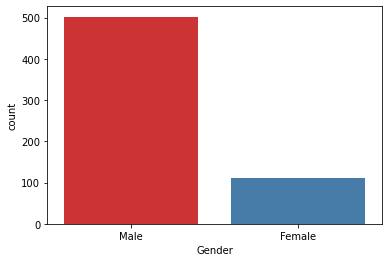

In [12]:
print("Number of peaple who took loan by gender")
print(data['Gender'].value_counts())
sns.countplot(x='Gender', data=data, palette='Set1')

Number of peaple who took loan by marital status
Yes    401
No     213
Name: Married, dtype: int64


<AxesSubplot:xlabel='Married', ylabel='count'>

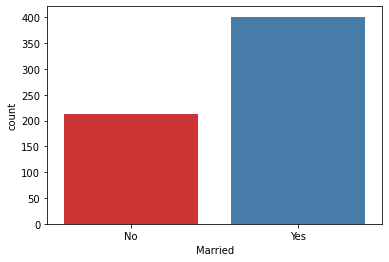

In [13]:
print("Number of peaple who took loan by marital status")
print(data['Married'].value_counts())
sns.countplot(x='Married', data=data, palette='Set1')

Number of people who took loan by Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


<AxesSubplot:xlabel='Education', ylabel='count'>

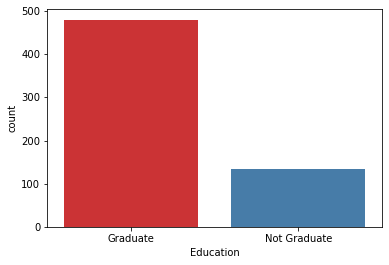

In [14]:
print("Number of people who took loan by Education")
print(data['Education'].value_counts())
sns.countplot(x='Education', data=data, palette='Set1')

<AxesSubplot:>

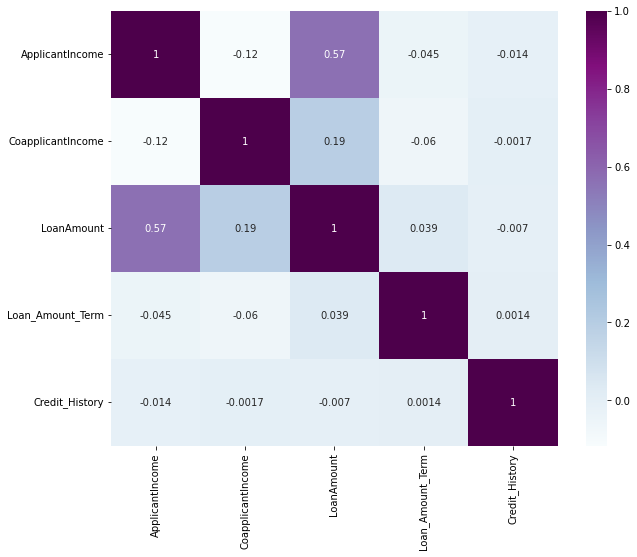

In [19]:
corr = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='BuPu')

In [ ]:
"""

"""

model.generate_content([
   
]).text